In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from superfv import EulerSolver, initial_conditions, plot_1d_slice
from teyssier.muscl import muscl, cons_to_prim
from teyssier.sedov import sedovana

In [2]:
gamma = 1.4
N = 100
T = 0.8

In [3]:
def sedov(idx, x, y, z, t, xp):
    return initial_conditions.sedov(
        idx,
        x,
        y,
        z,
        t,
        xp=xp,
        h=1 / N,
        gamma=gamma,
        P0=1e-5,
        rho0=1.0,
    )


sim = EulerSolver(
    ic=sedov,
    bcx=("reflective", "free"),
    nx=N,
    riemann_solver="hllct",
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter="moncen",
)

In [4]:
sim.musclhancock(T, allow_overshoot=True)

Step #306 @ t=8.01e-01 | dt=2.94e-03 | min(rho)=3.11e-02, min(P)=1.00e-05 | (done)                  


In [5]:
ut = muscl(
    tend=T,
    n=N,
    ic_type="sedov",
    bc_type="sedov",
    riemann_solver="hllc",
    slp_type="moncen",
)
wt = cons_to_prim(ut[-1])
x = (np.arange(N) + 0.5) / N

cell= 100  itermax= 100000
Done  306 0.8008567282004745


In [6]:
dim = 1
E0 = 1
rho0 = 1

r, d, u, P = sedovana(gamma, dim)

r *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (2 / (dim + 2))
d *= rho0
u *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (-dim / (dim + 2))
P *= (E0 / rho0) ** (2.0 / (dim + 2)) * T ** (-2 * dim / (dim + 2)) * rho0

chi0=np.float64(0.97306051566207)


In [7]:
# import romain solution as a dataframe
df = pd.read_csv(
    "romain_sedov.txt",
    delim_whitespace=True,
    usecols=[1, 2, 3, 4],
    names=["x", "d", "u", "P"],
    skiprows=1,
)

/var/folders/_g/1khjnxg53bn4cl_8ttksw3pc0000gn/T/ipykernel_76274/1098133986.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


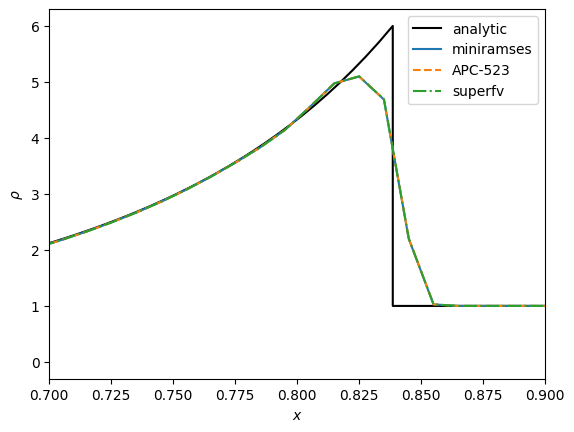

In [8]:
fig, ax = plt.subplots()

ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$x$")
ax.set_xlim(0.7, 0.9)

ax.plot(r, d, color="k", label="analytic")
ax.plot(df["x"], df["d"], label="miniramses")
ax.plot(x, wt[0], label="APC-523", linestyle="--")
plot_1d_slice(sim, ax, "rho", label="superfv", linestyle="-.")

ax.legend()